In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [3]:
data = np.load('data.npy')

In [4]:
target = np.load('target.npy')
target = tf.keras.utils.to_categorical(target) # converting [1,0,1,1,0...] to [[1,0],[0,1],[1,0]] i.e categorical
target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

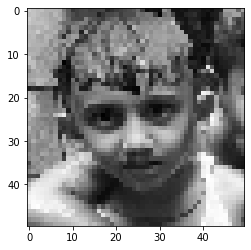

In [5]:
plt.imshow(data[90],cmap='gray')

In [6]:
target[90]

array([1., 0.], dtype=float32)

In [10]:
# we need to create a 3D image since our image have only one channel as its a greyscale img.
# so we will just replicate the image 3 times to create a 3d image.
# https://www.tensorflow.org/api_docs/python/tf/image/grayscale_to_rgb
# why RESHAPE - https://github.com/tensorflow/tensorflow/issues/26324 
# preprocessing
odata = data.copy()
ndata = []
for i in odata:
    image = i.reshape((*i.shape,1)) # as tf.image.grayscale_to_rgb requires last dimension to be 1, see why reshape link
    image = tf.convert_to_tensor(image)  # as tf.image.grayscale_to_rgb requires tensor for processing.
    ndata.append(tf.image.grayscale_to_rgb(image).numpy()/255.)

data = ndata.copy()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
np.shape(data)

(1651, 50, 50, 3)

In [13]:
trainx, testx, trainy, testy = train_test_split(data,
                                                target,
                                                test_size=0.15,
                                                random_state=345,
                                                shuffle=True)

trainx = np.array(trainx)
testx = np.array(testx)

In [14]:
trainy.shape

(1403, 2)

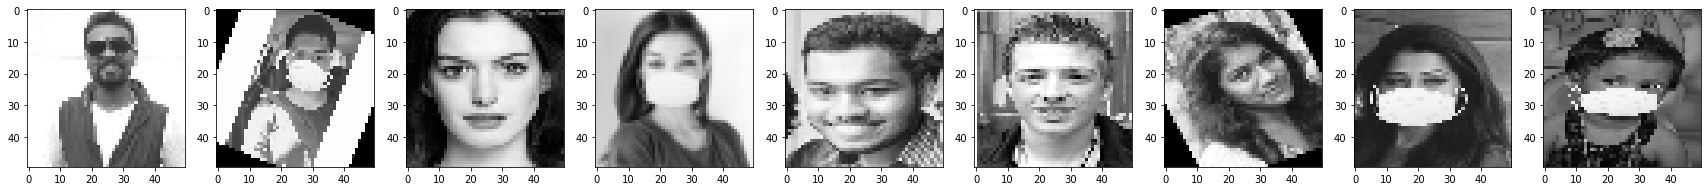

In [15]:
plt.figure(figsize=[30,30])
for i in np.arange(1,10):
    plt.subplot(int(f"19{i}"))
    plt.imshow(trainx[np.random.randint(0,1403)], cmap='gray')

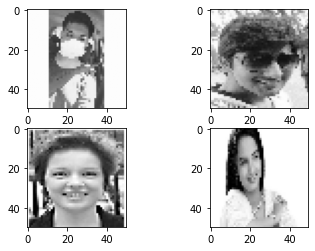

In [16]:
plt.subplot(221)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')
plt.subplot(222)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')
plt.subplot(223)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')
plt.subplot(224)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')

In [17]:
trainy[0]

array([0., 1.], dtype=float32)

In [18]:
img_shape = trainx[0].shape
img_shape  

(50, 50, 3)

In [19]:
model=Sequential()

model.add(layers.Conv2D(32,(3,3),input_shape=img_shape))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))


model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories


adam = tf.keras.optimizers.Adam(0.001)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
activation (Activation)      (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
activation_1 (Activation)    (None, 9, 9, 128)         0

In [24]:
history = model.fit(x=trainx,
                    y=trainy,
                    batch_size=100,
                    epochs=30,
                    validation_split=0.2,
                    verbose=2,
                    shuffle=True)

Epoch 1/30
12/12 - 3s - loss: 0.6879 - accuracy: 0.5285 - val_loss: 0.6778 - val_accuracy: 0.4698
Epoch 2/30
12/12 - 3s - loss: 0.6528 - accuracy: 0.5865 - val_loss: 0.6440 - val_accuracy: 0.5872
Epoch 3/30
12/12 - 3s - loss: 0.5815 - accuracy: 0.7041 - val_loss: 0.5822 - val_accuracy: 0.6050
Epoch 4/30
12/12 - 3s - loss: 0.4296 - accuracy: 0.8012 - val_loss: 0.3854 - val_accuracy: 0.8541
Epoch 5/30
12/12 - 3s - loss: 0.3216 - accuracy: 0.8663 - val_loss: 0.2449 - val_accuracy: 0.8968
Epoch 6/30
12/12 - 3s - loss: 0.2476 - accuracy: 0.9055 - val_loss: 0.3362 - val_accuracy: 0.8541
Epoch 7/30
12/12 - 3s - loss: 0.2835 - accuracy: 0.8922 - val_loss: 0.2459 - val_accuracy: 0.8932
Epoch 8/30
12/12 - 3s - loss: 0.2092 - accuracy: 0.9207 - val_loss: 0.1348 - val_accuracy: 0.9502
Epoch 9/30
12/12 - 3s - loss: 0.1648 - accuracy: 0.9305 - val_loss: 0.1293 - val_accuracy: 0.9644
Epoch 10/30
12/12 - 3s - loss: 0.1382 - accuracy: 0.9545 - val_loss: 0.1056 - val_accuracy: 0.9431
Epoch 11/30
12/12 -

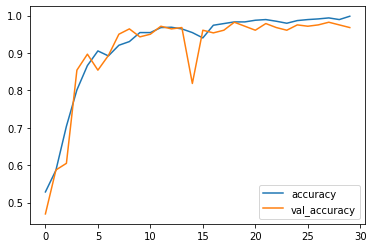

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])

In [26]:
model.evaluate(testx, testy)

8/8 [==============================] - 0s 28ms/step - loss: 0.1841 - accuracy: 0.9435


[0.18408986926078796, 0.9435483813285828]

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testx, testy)

ValueError: Classification metrics can't handle a mix of unknown and multilabel-indicator targets

In [32]:
model.save('cnn.h5')